# Analysis of the size of Dirichlet parameters when using E[ln(theta)] vs E[theta]

In this notebook, I take a look at how $E[\ln(\theta)]$ vs $E[\theta]$ changes the size of the Dirichlet's $\alpha$ and $\beta$ parameters. I look at what these values will be during inference when using some famous corpora. For the word-topic distributions, the $\beta$ values will be different per work, but we can look the total number of counts, as well as a 10th of the number of counts, just to get an idea of the effect this message change will have.

In [12]:
import numpy as np
from math import exp
import scipy
from scipy.special import digamma
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()


## Some data sets and their characteristics 
#### docs in corpus, vocabulary after tokenisation, words per doc (avg)

In [13]:
# number of docs in corpus, vocabulary after tokenisation, words per doc (avg)
real = {"CORA": [2410, 2961, 57],
        "MEDL":[2317, 8918, 104],
        "NIPS":[1740, 13649, 1323],
        "BLOG":[5177, 33574, 217]}

ndocslist = [2410,2317,1740,5177]
wordperdoc = [57, 104, 1323, 217]
vocab = [2961, 8918, 13649, 33574]

Above, the blue lines represent $E[\ln(\theta)]$ and the green lines, $E[\theta]$.

## Beta plots (driven by topic word distribution)

CORA: D=2961, W=57 2410 46.89311043566363
MEDL: D=8918, W=104 2317 27.520408163265305
NIPS: D=13649, W=1323 1740 169.15850978093633
BLOG: D=33574, W=217 5177 33.96068386251266


<Figure size 432x288 with 0 Axes>

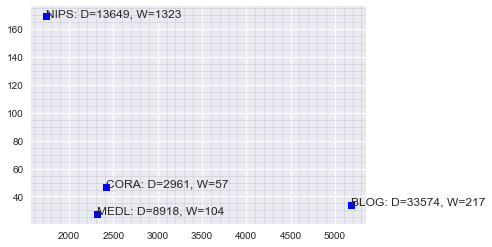

<Figure size 432x288 with 0 Axes>

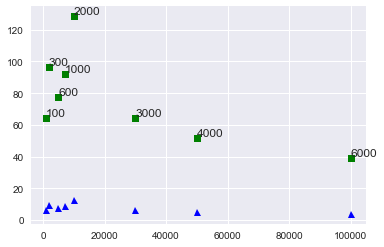

In [143]:

plt.figure()
fig, ax = plt.subplots()
prior = 0.5
ndocslist = [2410,2317,1740,5177]
wordperdoc = [57, 104, 1323, 217]
vocabs = [2961, 8918, 13649, 33574]
texts = ["CORA: D=2961, W=57",
        "MEDL: D=8918, W=104",
        "NIPS: D=13649, W=1323",
        "BLOG: D=33574, W=217"]
for i, vocab in enumerate(vocabs):
    x = ndocslist[i]
    s = prior + ndocslist[i]*wordperdoc[i]/vocab
    ax.plot(x, s, 'bs')
    print(texts[i], x, s)
    ax.annotate(texts[i],( x, s))
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

plt.figure()
fig, ax = plt.subplots()
prior = 0.5
wordperdoc = 640
topics = 7
vocab = [1000,2000,5000,7000,10000,30000,50000,100000]
docnr = [100,300,600,1000,2000,3000,4000,6000]
ntopics = np.array(ntopicss)

wordsperdoc=640

ax.plot(vocab,prior + np.array(docnr)*wordsperdoc/np.array(vocab),   'gs')
for i, txt in enumerate(docnr):
    ax.annotate(txt, (vocab[i]+prior-100, prior+ docnr[i]*wordperdoc/vocab[i]+1.2))
ax.plot(vocab,np.array(docnr)*wordsperdoc/(np.array(vocab)*10),   'b^')







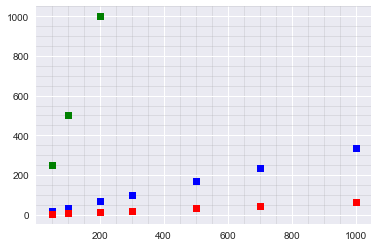

In [144]:
plt.figure()
prior = 0.5
ndocslist = [50,100,200,300,500,700,1000]
wordperdoc = 20
vocab = 60
plt.plot(ndocslist, [prior + docnr*wordperdoc/vocab for docnr in ndocslist], 'bs')
wordperdoc = 640
vocab = 10000
plt.plot(ndocslist, [prior + docnr*wordperdoc/vocab for docnr in ndocslist],'rs')
ndocslist = [50,100,200]
wordperdoc = 100
vocab = 20
plt.plot(ndocslist, [prior + docnr*wordperdoc/vocab for docnr in ndocslist],'gs')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)




### Alpha plots (driven by doc-topic distribution)

<Figure size 432x288 with 0 Axes>

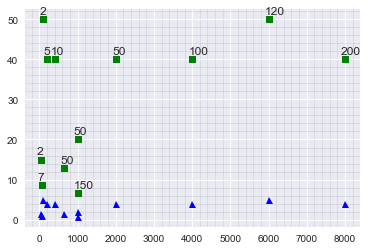

In [145]:
plt.figure()
fig, ax = plt.subplots()
prior = 1/60
wordperdoc = 20
topics = 7
ntopicss = [5,10,7,150,50,50,50,120,100,200,2,2]
ntopics = np.array(ntopicss)
wordsperdocs = np.array([200,400,60,1000,640,1000,2000,6000,4000,8000,30,100])

ax.plot(wordsperdocs,wordsperdocs/ntopics,   'gs')
for i, txt in enumerate(ntopicss):
    ax.annotate(txt, (prior + wordsperdocs[i]-100, prior +wordsperdocs[i]/ntopics[i]+1.2))
ax.plot(wordsperdocs,prior + np.array(wordsperdocs)/(np.array(ntopics)*10),   'b^')



plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)


[0.01 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11 0.11]
1.0
[0.9        0.01111111 0.01111111 0.01111111 0.01111111 0.01111111
 0.01111111 0.01111111 0.01111111 0.01111111]
0.9999999999999997
[0.5        0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556]
1.0000000000000002


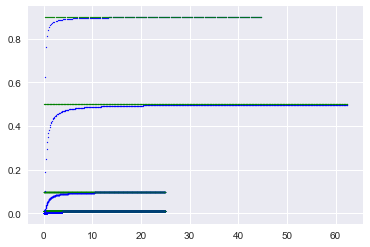

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ar = (np.ones(10)/10)
ar[0] = 0.01
ar[1:] = ar[1:]/(np.sum(ar[1:])) - ar[0]/(len(ar)-1)
print(ar)
print(sum(ar))

for i in np.array(range(1,10000))/4:
    alphas = ar*i
    vb = exp(digamma(alphas[0]) - digamma(np.sum(alphas)))
    bp = exp(np.log(alphas[0]) - np.log(np.sum(alphas)))
    plt.scatter(alphas[0], vb, c="b", s=1)
    plt.scatter(alphas[0], bp, c="g", s=1)

ar = (np.ones(10)/10)

ar[0] = 0.9
ar[1:] = ar[1:]/(np.sum(ar[1:])) - ar[0]/(len(ar)-1)
print(ar)
print(sum(ar))
for i in np.array(range(1,200))/4:
    alphas = ar*i
    vb = exp(digamma(alphas[0]) - digamma(np.sum(alphas)))
    bp = exp(np.log(alphas[0]) - np.log(np.sum(alphas)))
    plt.scatter(alphas[0], vb, c="b", s=1)
    plt.scatter(alphas[0], bp, c="g", s=1)

ar = (np.ones(10)/10)


for i in np.array(range(1,1000))/4:
    alphas = ar*i
    vb = exp(digamma(alphas[0]) - digamma(np.sum(alphas)))
    bp = exp(np.log(alphas[0]) - np.log(np.sum(alphas)))
    plt.scatter(alphas[0], vb,c='b',s=1)
    plt.scatter(alphas[0], bp, c='g',s=1)
    
ar = (np.ones(10)/10)
ar[0] = 0.5
ar[1:] = ar[1:]/(np.sum(ar[1:])) - ar[0]/(len(ar)-1)

for i in np.array(range(1,500))/4:
    alphas = ar*i
    vb = exp(digamma(alphas[0]) - digamma(np.sum(alphas)))
    bp = exp(np.log(alphas[0]) - np.log(np.sum(alphas)))
    plt.scatter(alphas[0], vb,c='b',s=1)
    plt.scatter(alphas[0], bp, c='g',s=1)
plt.show()



